In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, Y = [], []
non_decimal = re.compile(r'[^\d]+')

In [3]:
for line in open('/home/launchyard/Desktop/lazy_programmer/machine_learning_examples/linear_regression_class/moore.csv'):
    r = line.split('\t')
    x = int(non_decimal.sub('', r[2].split('[')[0])) # Years
    y = int(non_decimal.sub('', r[1].split('[')[0])) # Transistor Count

    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

In [4]:
X

array([1971, 1972, 1974, 1974, 1974, 1974, 1975, 1976, 1976, 1978, 1978,
       1979, 1979, 1981, 1982, 1982, 1983, 1984, 1985, 1985, 1985, 1986,
       1987, 1988, 1988, 1989, 1989, 1991, 1991, 1993, 1994, 1995, 1995,
       1996, 1997, 1997, 1998, 1999, 1999, 1999, 1999, 1999, 2000, 2000,
       2001, 2002, 2002, 2003, 2003, 2003, 2004, 2004, 2005, 2005, 2006,
       2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2008, 2008,
       2008, 2008, 2008, 2009, 2010, 2010, 2010, 2010, 2010, 2010, 2011,
       2011, 2011, 2012, 2012, 2012, 2012, 2012, 2012, 2012, 2013, 2013,
       2013, 2013, 2014, 2014, 2014, 2014, 2014, 2014, 2015, 2015, 2015,
       2015, 2015, 2016])

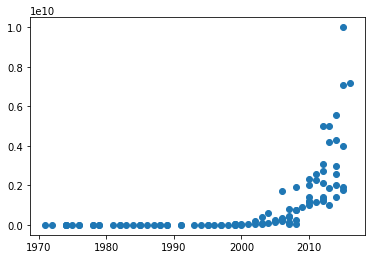

In [5]:
plt.scatter(X, Y)
plt.show()

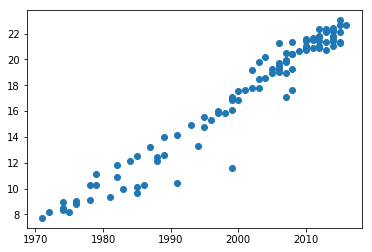

In [6]:
# Taking the log of Y.
Y = np.log(Y)
plt.scatter(X, Y)
plt.show()

In [7]:
denominator = X.dot(X) - X.mean() * X.sum()

In [8]:
a = (X.dot(Y) - Y.mean() * X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator

In [9]:
Yhat = a*x + b

In [10]:
plt.scatter(X, Y)
plt.plot(X, Yhat)

ValueError: x and y must have same first dimension, but have shapes (102,) and (1,)

In [11]:
# Determine how good our model is:
d1 = Y - Yhat
d2 = Y - Y.mean()
# Calculating r squared
r2 = 1 - d1.dot(d1)/d2.dot(d2)

In [12]:
print("a: {}, b: {}".format(a, b))

a: 0.35104357336499337, b: -685.0002843816548


In [13]:
print("R squared value: {}".format(r2))

R squared value: -1.4769822248444004


In [14]:
## We want to know how long does it really take for transistor count to double
## Simple maths where tc means transistor count
# log(tc) = a*year + b
# taking log on both sides
# tc = exp(b) * exp(a*year)
# 2tc = 2 * exp(b) * exp(a*year) 
# which is then equal to
# exp(ln(2)) * exp(b) * exp(a*year)
# exp(b) * exp(a * year + ln(2))
# which ultimately means
# a * year2 = a * year1 + ln2
# so finalyy
# year2 = year1 + ln2/a

In [15]:
# SO the time to double
print("Time to double is: {} years".format(np.log(2))/a)

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''